# Exploratory Data Analysis

In [76]:
# print pythonPath 
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [77]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from src.data.download import download_dataset

df = download_dataset()

In [78]:
# View first few rows
print(df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())


  Status_of_existing_checking_account  Duration_in_month Credit_history  \
0                                 A11                  6            A34   
1                                 A12                 48            A32   
2                                 A14                 12            A34   
3                                 A11                 42            A32   
4                                 A11                 24            A33   

  Purpose  Credit_amount Savings_account/bonds Present_employment_since  \
0     A43           1169                   A65                      A75   
1     A43           5951                   A61                      A73   
2     A46           2096                   A61                      A74   
3     A42           7882                   A61                      A74   
4     A40           4870                   A61                      A73   

   Installment_rate_in_percentage_of_disposable_income  \
0                                       

In [79]:
from src.data.preprocessing import encode_categorical, scale_features

df = encode_categorical(df)
df = scale_features(df)

df.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors/guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Target
0,-1.254566,-1.236478,1.344014,0.264068,-0.745131,1.833169,1.338078,0.918477,0.449326,-0.303686,...,-1.293723,2.766456,0.460831,0.133710,1.027079,0.146949,-0.428290,1.214598,-0.196014,0
1,-0.459026,2.248194,-0.503428,0.264068,0.949817,-0.699707,-0.317959,-0.870183,-0.963650,-0.303686,...,-1.293723,-1.191404,0.460831,0.133710,-0.704926,0.146949,-0.428290,-0.823318,-0.196014,1
2,1.132053,-0.738668,1.344014,1.359785,-0.416562,-0.699707,0.510060,-0.870183,0.449326,-0.303686,...,-1.293723,1.183312,0.460831,0.133710,-0.704926,-1.383771,2.334869,-0.823318,-0.196014,0
3,-1.254566,1.750384,-0.503428,-0.101171,1.634247,-0.699707,0.510060,-0.870183,0.449326,3.885083,...,-0.341055,0.831502,0.460831,2.016956,-0.704926,0.146949,2.334869,-0.823318,-0.196014,0
4,-1.254566,0.256953,0.420293,-1.196889,0.566664,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,1.564281,1.535122,0.460831,2.016956,1.027079,0.146949,2.334869,-0.823318,-0.196014,1


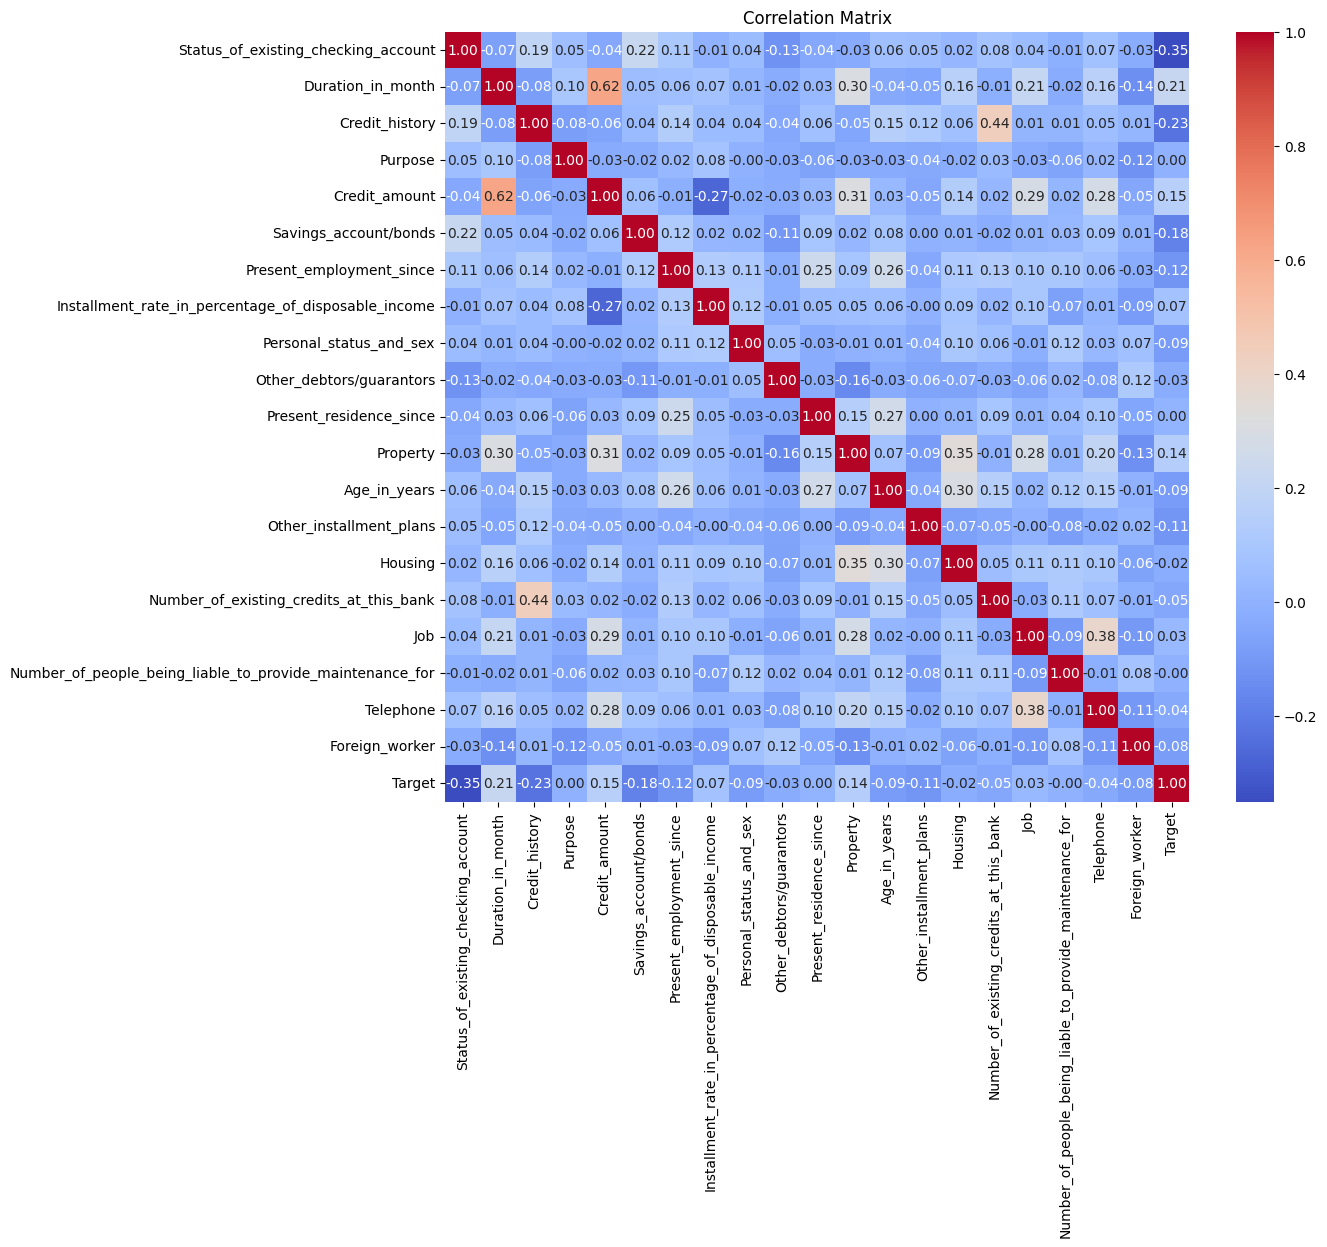

In [80]:
# Convert non-numeric columns to numeric or drop them
df_numeric = df.select_dtypes(include=[float, int])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [81]:
from src.features.feature_engineering import drop_high_corr

df = drop_high_corr(df, corr_matrix)
print(df.head())

   Status_of_existing_checking_account  Duration_in_month  Credit_history  \
0                            -1.254566          -1.236478        1.344014   
1                            -0.459026           2.248194       -0.503428   
2                             1.132053          -0.738668        1.344014   
3                            -1.254566           1.750384       -0.503428   
4                            -1.254566           0.256953        0.420293   

    Purpose  Credit_amount  Savings_account/bonds  Present_employment_since  \
0  0.264068      -0.745131               1.833169                  1.338078   
1  0.264068       0.949817              -0.699707                 -0.317959   
2  1.359785      -0.416562              -0.699707                  0.510060   
3 -0.101171       1.634247              -0.699707                  0.510060   
4 -1.196889       0.566664              -0.699707                 -0.317959   

   Installment_rate_in_percentage_of_disposable_income  \
0   

In [83]:
from src.models.training import split_data

X_train, X_test, y_train, y_test = split_data(df, "Target")

In [84]:
from src.models.model import create_model
from src.models.training import fit_model

model = create_model()
model = fit_model(model, X_train, y_train)

/Users/brendan/.pyenv/versions/3.12.0/envs/credit-risk/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [07:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
